In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q keras
!pip install tensorflow==2.15.0

In [3]:
import numpy as np 
import pandas as pd 


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

mnist dataset


In [5]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sign_mnist_dataset/sign_mnist_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sign_mnist_dataset/sign_mnist_test.csv")

In [6]:
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sign_mnist_dataset/sign_mnist_test.csv")
y = test['label']


In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


# Preprocessing

In [ ]:
plt.figure(figsize = (10,10)) 
sns.set_style("darkgrid")
sns.countplot(train_df['label'])

In [7]:
y_train = train_df['label']
y_test = test_df['label']

del train_df['label']
del test_df['label']


In [8]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)



In [9]:
x_train = train_df.values
x_test = test_df.values



Normalization


In [10]:

x_train = x_train / 255
x_test = x_test / 255


In [11]:

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)


**Preview of first 10 images**

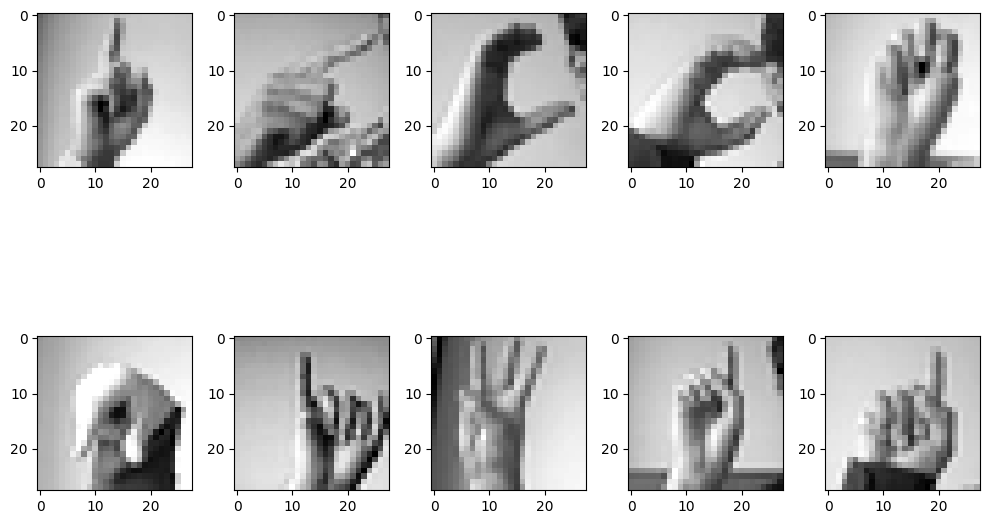

In [12]:
f, ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

In [13]:


datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

# CONVOLUTIONAL NEURAL NETWORK


# Training The Model

In [14]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)
# early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [15]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128, (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())
model.add(Dense(units = 256 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)         0

In [ ]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 15 , validation_data = (x_test, y_test) , callbacks = [learning_rate_reduction])

In [17]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/Colab Notebooks/sign_mnist_dataset/model.h5')

In [18]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

225/225 [==============================] - 4s 17ms/step - loss: 0.0096 - accuracy: 0.9985
Accuracy of the model is -  99.84662532806396 %


 (graph)

In [ ]:
epochs = [i for i in range(15)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

#prediction

In [20]:

def predict_classes_one_hot(model, x_test):
    
    predictions = model.predict(x_test)

    predicted_classes_one_hot = np.zeros_like(predictions)
    predicted_classes_one_hot[np.arange(len(predictions)), predictions.argmax(axis=1)] = 1

    return predicted_classes_one_hot

predicted_classes_one_hot = predict_classes_one_hot(model, x_test)

print("Predicted Classes (One-Hot):", predicted_classes_one_hot)

225/225 [==============================] - 4s 16ms/step
Predicted Classes (One-Hot): [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [21]:

def convert_one_hot_to_labels(one_hot_predictions, label_binarizer):
    
    predicted_labels = label_binarizer.inverse_transform(one_hot_predictions)

    return predicted_labels


predicted_labels = convert_one_hot_to_labels(predicted_classes_one_hot, label_binarizer)


print("Predicted Labels:", predicted_labels)

Predicted Labels: [ 6  5 10 ...  2  4  2]


In [ ]:
classes = ["Class " + str(i) for i in range(25) if i != 9]
print(classification_report(y, predicted_labels, target_names = classes))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       175
     Class 1       1.00      1.00      1.00       243
     Class 2       1.00      1.00      1.00       168
     Class 3       1.00      1.00      1.00       127
     Class 4       1.00      1.00      1.00       285
     Class 5       1.00      1.00      1.00       134
     Class 6       1.00      1.00      1.00       185
     Class 7       1.00      1.00      1.00       241
     Class 8       1.00      1.00      1.00       161
    Class 10       1.00      1.00      1.00       187
    Class 11       1.00      1.00      1.00       118
    Class 12       1.00      1.00      1.00       214
    Class 13       1.00      1.00      1.00       155
    Class 14       1.00      1.00      1.00       141
    Class 15       1.00      1.00      1.00       189
    Class 16       1.00      1.00      1.00        88
    Class 17       1.00      1.00      1.00        85
    Class 18       1.00    

In [ ]:
cm = confusion_matrix(y,predicted_labels)
cm

array([[175,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 243,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 168,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 127,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 285,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 134,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 185,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0

In [ ]:
cm = pd.DataFrame(cm , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])

<Axes: >

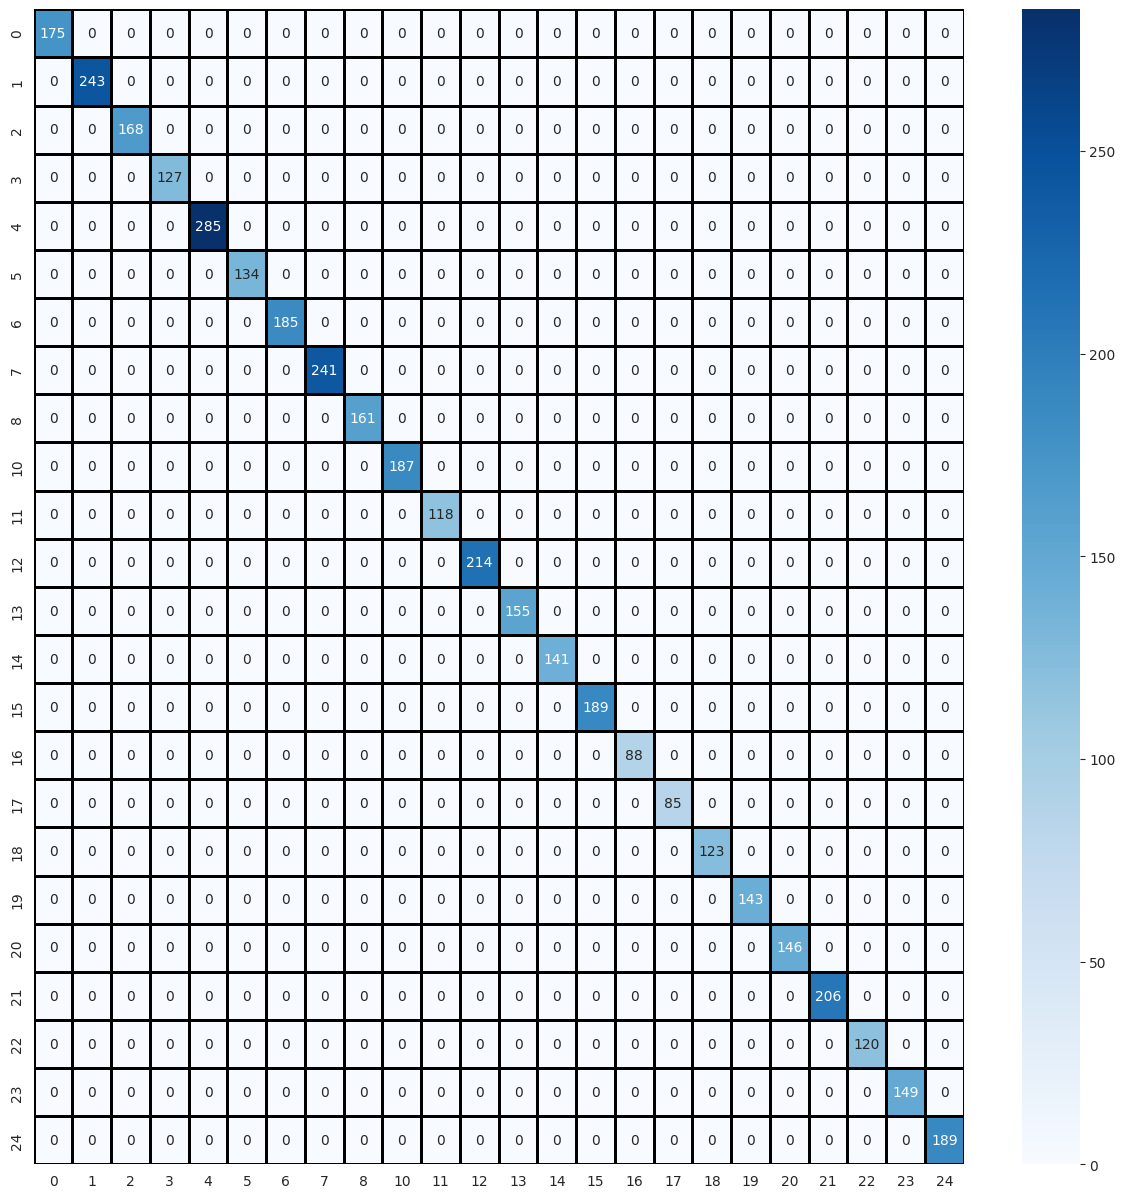

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [22]:
# correct = np.nonzero(predicted_labels == y)[0]

correct = np.where(predicted_labels == y)[0]



**Some Predicted Classes**

<ipython-input-25-049767600891>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,i+1)


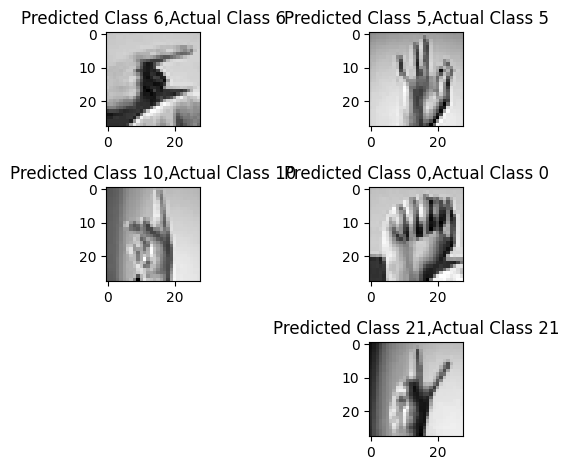

In [25]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.imshow(x_test[c].reshape(28,28), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predicted_labels[c], y[c]))
    plt.tight_layout()
    i += 1